# PHT Eclipsing Binary Catalog

- data covered: sectors 1 - 39 (2 years of Southern hemisphere and 1 year of Northern hemisphere)

In [2]:
from importlib import reload

from IPython.display import display

import pandas as pd
from pandas.io.clipboard import clipboard_set

import catalog_stats
from catalog_stats import CAT_COLS_COMMON
import dashboard_utils
from dashboard_utils import two_columns

Could not import regions, which is required for some of the functionalities of this module.


## Tagging accuracy and Catalog coverage

GridBox(children=(Output(layout=Layout(border='1px dotted gray')), Output(layout=Layout(border='1px dotted gra…

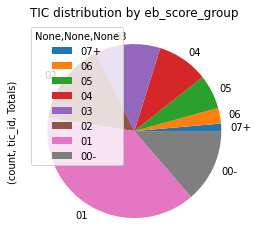

In [3]:
# reload(catalog_stats)

df_catalog = dashboard_utils.get_catalog("pht_eb")

grid, col1, col2 = two_columns(also_return_outputs=True)

with col1:
    report, styler = catalog_stats.pivot_by_eb_score_group(df_catalog, also_return_styler=True)
    display(styler)

with col2:
    ax = report[report.index != "Totals"].plot.pie(y=('count', 'tic_id', 'Totals'));
    ax.set_title("TIC distribution by eb_score_group")
    display(ax.get_figure())

display(grid);

## Coverage of individual catalogs

In [6]:
report_simbad, styler_simbad = catalog_stats.pivot_by_eb_score_group(df_catalog, columns="SIMBAD_Is_EB", also_return_styler=True)
# display(report_simbad[report_simbad.index == "Totals"])
display(two_columns(styler_simbad, styler))

report_vsx, styler_vsx = catalog_stats.pivot_by_eb_score_group(df_catalog, columns="VSX_Is_EB", also_return_styler=True)
# display(report_vsx[report_vsx.index == "Totals"])
display(two_columns(styler_vsx, styler))

GridBox(children=(Output(layout=Layout(border='1px dotted gray')), Output(layout=Layout(border='1px dotted gra…

GridBox(children=(Output(layout=Layout(border='1px dotted gray')), Output(layout=Layout(border='1px dotted gra…

### Compare raw number of EB votes vs adjusted eb_score 
- can we just use raw `num_votes_eb`, rather than adjusted `eb_score`, to gauge the likelihood of TIC being an eclipsing binary?

In [5]:
report_by_score, styler_by_score = catalog_stats.pivot_by_eb_score_group(df_catalog, row="num_votes_eb_group", also_return_styler=True)
display(two_columns(styler_by_score, styler))

GridBox(children=(Output(layout=Layout(border='1px dotted gray')), Output(layout=Layout(border='1px dotted gra…

## Sample TICs

In [21]:
df = df_catalog
df = (
    df
    [df["is_eb_catalog"] == "F"]
    .groupby("eb_score_group")
    .head(2)
    .sort_values(["eb_score_group"], ascending=[False])
    )
# clipboard_set(df[CAT_COLS_COMMON].to_markdown())
# df[CAT_COLS_COMMON].to_clipboard()
df[CAT_COLS_COMMON].style.hide(axis='index')

tic_id,best_subject_id,is_eb_catalog,eb_score,SIMBAD_MAIN_ID,SIMBAD_OTYPES,SIMBAD_Is_EB,VSX_Name,VSX_Type,VSX_Is_EB,VSX_Period
143669444,32026607,F,11,HD 64881,*|IR,-,HD 64881,ACV|ELL,F,1.103900
281581467,60853074,F,7,TYC 8911-718-1,PM*|*|IR,-,ASASSN-V J074356.39-602347.2,ROT:,F,nan
4200337,56365918,F,6,nan,nan,-,CSS_J052244.8-010231,BY,F,8.164117
77209028,30249806,F,6,CD-38 1652,Ro*|V*|*|IR|X,F,ASAS J043559-3841.6,ROT,F,0.568900
17342647,48229829,F,5,HD 144359,*|IR|UV,-,HD 144359,HB,F,4.382000
43273020,48223594,F,5,AG+41 1420,PM*|BY*|SB*|V*|*|IR|X,F,V1221 Her,BY,F,1.813700
22120766,41413067,F,4,CD-23 8836,Ro*|PM*|V*|*|IR|X,F,ASAS J095357-2408.8,ROT,F,1.668000
35044762,60849117,F,4,TYC 7702-75-1,*|IR,-,ASASSN-V J095059.01-425034.5,L,F,nan
8669966,48223652,F,3,* 32 Her,SB*|**|*|IR|UV,-,NSV 20695,ELL+DSCT,F,3.394306
10863087,52587377,F,3,RX J0143.7-0602,PM*|SB*|Er*|PM*|*|*|IR|X,F,nan,nan,-,nan


GridBox(children=(Output(layout=Layout(border='1px dotted gray')), Output(layout=Layout(border='1px dotted gra…

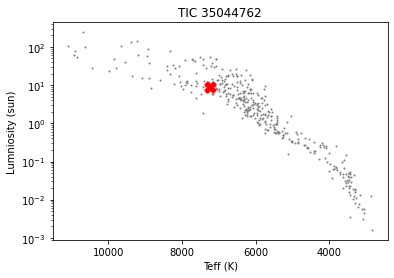

In [4]:
dashboard_utils.display_details(
    tic_id=35044762, 
    type="tic_meta",
    brief=True,
)